In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
import numpy as np
import matplotlib.pyplot as plt


f = 175e-3  
lambda_ = 660e-9 
A = np.exp(1j * np.random.uniform(0, 2 * np.pi)) 
phi = 0  
grid_size = 1200
x0, y0, z0 = 0, 0, 0


x = np.linspace(-1, 1, grid_size)
y = np.linspace(-1, 1, grid_size)
X, Y = np.meshgrid(x, y)

k = 2 * np.pi / lambda_ 


def generate_centered_grid_coordinates(m, n):
    # x, y 좌표 생성 (0을 중심으로 정렬)
    x_coords = np.linspace(-(m-1)/2, (m-1)/2, m)
    y_coords = np.linspace(-(n-1)/2, (n-1)/2, n)
    
    # 2D 좌표 리스트 생성
    grid = [list([x, y]) for x in x_coords for y in y_coords]
    
    # np.array로 변환
    grid_array = np.array(grid)
    return grid_array

# 예시 사용
m = 4 # 가로 방향 점의 개수
n = 4 # 세로 방향 점의 개수

coordinates = generate_centered_grid_coordinates(m, n)


step = 5*np.pi


H =np.zeros((grid_size,grid_size) , dtype = 'complex128')

for i,j in coordinates:
    a = np.pi / (f * lambda_)
    x = i * step/a
    y = j * step/a
    A = np.exp(1j * np.random.uniform(0, 2 * np.pi))/(size**2)
    # A = 1
    H += A * np.exp(1j * (2 * a * (x * X + y * Y) + (z0 / (2 * f)) * (X**2 + Y**2)) + 1j*phi)


F = np.fft.fftshift(np.fft.fft2(H))  
intensity = np.abs(F)**2 

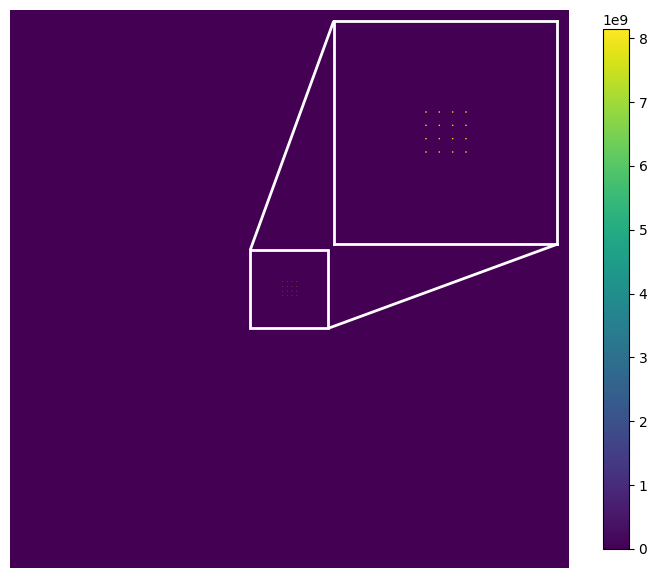

In [145]:
from plotting import plot_holoWzoom, plot_four, plot_fieldWzoom

fig, axs = plt.subplots(1,1, figsize=(9,9))
plot_holoWzoom(intensity, ax=axs,  rz=0.07, xyzoom=[0.5,0.5], cmap="viridis")
img = axs.imshow(intensity)
# axs.axis('off')
fig.colorbar(img, shrink = 0.75)

In [158]:
field = H

p = 30
# nuvec = (1/p,1/p) # periodicity of granting
nuvec = (1/p,1/p) # periodicity of granting

a = np.abs(field) # Amplitude target
a /=np.max(a) # renorm of amplitude
phi = np.angle(field) # Phase of target
x,y = np.meshgrid(np.arange(np.shape(field)[0]),np.arange(np.shape(field)[1])) # 2D granting 

nunorm = 2*np.linalg.norm(nuvec) # spatial frequency of encoding field by Nyquist samping theorem
x,y =  x-nuvec[1]/nunorm, y+nuvec[0]/nunorm

In [159]:
T =(1+np.sign(np.cos(2*np.pi*(nuvec[0]*x + nuvec[1]*y)-phi) + np.cos(np.arcsin(a))))/2

(np.float64(-0.5), np.float64(1199.5), np.float64(1199.5), np.float64(-0.5))

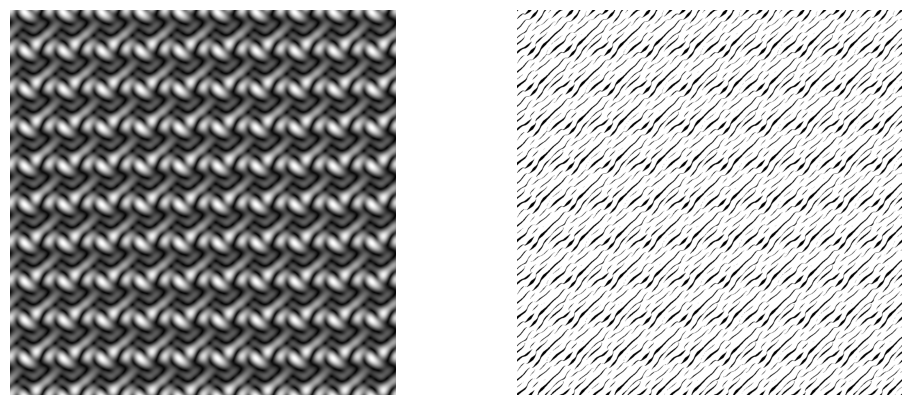

In [160]:
field = H

amp = np.abs(field)/np.max(np.max(field))
phi = np.angle(field)
pp = np.arcsin(amp)

R = 0.5 + 0.5*np.sign(np.cos(pp)+np.cos(phi))

plt.subplots(1,2, figsize = (12,5))
plt.subplot(1,2,1)
plt.imshow(np.abs(H), cmap = 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(np.abs(T), cmap = 'gray')
plt.axis('off')

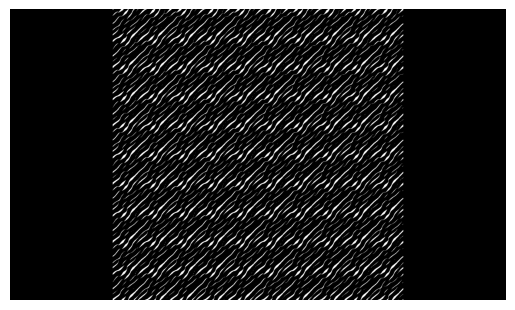

In [316]:
from PIL import Image
import numpy as np

# 1. 이미지 불러오기 및 0/1 이진화
binary_img =1 - np.abs(T)  # 파일 경로를 실제로 사용 중인 경로로 바꾸세요
# img = Image.open(input_path).convert("L")  # 흑백화
# binary_img = (np.array(img) > 127).astype(np.uint8)  # 0,1 이진화

# 2. 새로운 2048x1200 이미지 생성 (0으로 채움)
new_width = 2048
new_height = 1200
output_img = np.zeros((new_height, new_width), dtype=np.uint8)

# 3. 중앙 정렬: 좌우 가운데에 1200 픽셀 삽입
start_col = (new_width - 1200) // 2
output_img[:, start_col:start_col + 1200] = binary_img

# 4. 저장 (0/1 이미지를 0/255로 변환하여 시각화 가능하게 만듦)
output_pil = Image.fromarray(output_img * 255)
output_pil.save("2048x1200_output.bmp")
plt.imshow(output_pil, cmap='gray') 
plt.axis('off')
plt.show()
# plt.savefig(output_pil, "2048x1200_output.png")

In [ ]:
import os, sys 

os.getcwd()

'c:\\Users\\wlsgu\\JH\\Project\\KIST\\code\\generate_hologram'

In [161]:
aperture_position = nuvec # Location of 1st diffraction oder. reciprocal primitive vector of b is the same as carrier fregency \nu
SA_filter = 1.0*np.linalg.norm(nuvec)/4 # Radius of the circular aperture used to filter the diffraction order. 

In [162]:
nr, nc = T.shape 
Col, Row = np.meshgrid(np.arange(nc),np.arange(nr))

phase_shift = np.exp(1j*2*np.pi* (aperture_position[0]*Col+aperture_position[1]*Row))
ft_mask = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(phase_shift*T))) # T moves by the phase of the aperature position. -> 1st difraction order is located in center 
fx, fy = np.meshgrid(np.fft.fftshift(np.fft.fftfreq(nc)),np.fft.fftshift(np.fft.fftfreq(nr)))
aperture = fx**2 + fy**2 < SA_filter**2 
filtered_field = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(aperture*ft_mask))) # hologram of target field 

Fourier_image  = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(T))) # image of fourier plane 

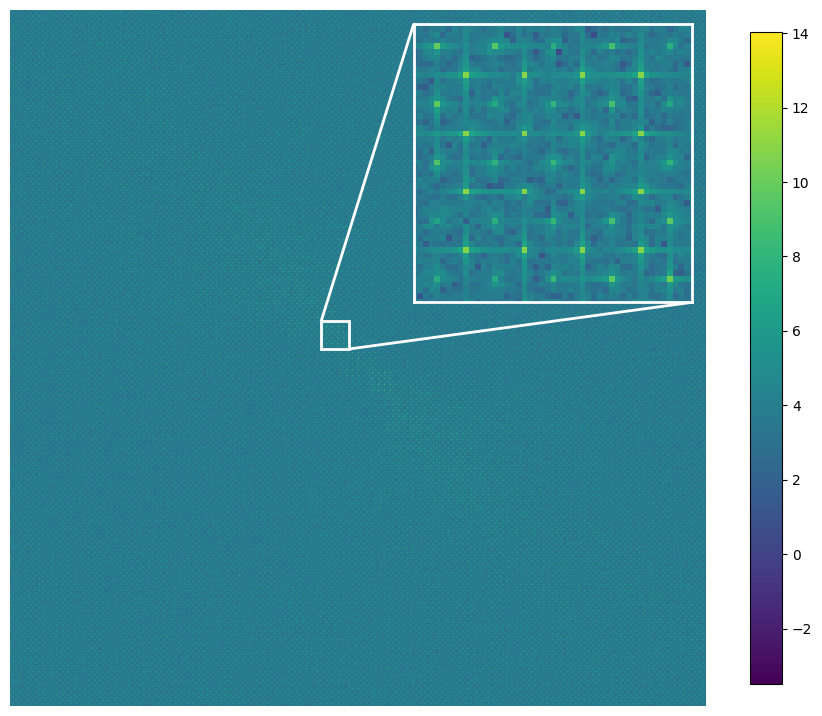

In [163]:
Fourier_im = np.log(np.abs(Fourier_image))
# Fourier_im = np.abs(Fourier_image)

# plt.figure(figsize=(8,8))
# plt.imshow(Fourier_im) #[412:612-110,412:612-100]
# plt.axis('off')

xyzoom_spot = [0.5-1/p,0.5-1/p]
fig, axs = plt.subplots(1,1, figsize=(9,9))
plot_holoWzoom(Fourier_im, ax=axs,  rz=0.020, xyzoom=xyzoom_spot, cmap="viridis")
img = axs.imshow(Fourier_im)
axs.axis('off')
fig.tight_layout()
fig.colorbar(img, shrink = 0.75)

#### Total Code  
1. GS algorithm 구현  
    1-1. error mask 
    1-2. GS algorithm.py 구현  
2. Control camera  
3. Control dlp product(정리)  
4. generate hologram  
    4-1. 현제 DMD에 대해 phase encoding 한계 알아보기  
    4-2. 실제 대물렌즈에 보이는 이미지 생성  
    4-3.  
5. 최적화 코드  
    5-1. 카메라 이미지, DMD 패턴의 픽셀 동기화 필요.  

In [132]:
(468+12+6+3*4.5)/(127+3)

3.8423076923076924

In [164]:
from itertools import combinations

def is_valid(arrangement):
    rows = set()
    cols = set()
    for r, c in arrangement:
        if r in rows or c in cols:
            return False
        rows.add(r)
        cols.add(c)
    return True

def find_original_arrangement(grid):
    n = len(grid)
    bead_positions = [(i, j) for i in range(n) for j in range(n) if grid[i][j] == 1]
    
    for candidate in combinations(bead_positions, n):
        if is_valid(candidate):
            return candidate
    return None

def print_grid(grid):
    for row in grid:
        print(" ".join(str(cell) for cell in row))

# 예시 입력
example_grid = [
    [1, 1, 0],
    [0, 1, 1],
    [1, 0, 1]
]

print("입력된 격자:")
print_grid(example_grid)

result = find_original_arrangement(example_grid)

print("\n복원된 원래 진열 위치:")
if result:
    for pos in result:
        print(f"행 {pos[0]}, 열 {pos[1]}")
else:
    print("해당 조건을 만족하는 원래 진열을 찾을 수 없습니다.")


입력된 격자:
1 1 0
0 1 1
1 0 1

복원된 원래 진열 위치:
행 0, 열 0
행 1, 열 1
행 2, 열 2


In [277]:
def solve_n_queens(n):
    def backtrack(row, diagonals, anti_diagonals, cols, state):
        if row == n:
            results.append(state[:])
            return

        for col in range(n):
            if col in cols or (row - col) in diagonals or (row + col) in anti_diagonals:
                continue

            cols.add(col)
            diagonals.add(row - col)
            anti_diagonals.add(row + col)
            state.append((row, col))

            backtrack(row + 1, diagonals, anti_diagonals, cols, state)

            cols.remove(col)
            diagonals.remove(row - col)
            anti_diagonals.remove(row + col)
            state.pop()

    results = []
    backtrack(0, set(), set(), set(), [])
    return results

# 예시 실행: N-Queens 해답 출력
n = 4
solutions = solve_n_queens(n)
print(f"{n}x{n} N-Queens 문제의 해답 수: {len(solutions)}")

for sol in solutions:   
    print(sol)

4x4 N-Queens 문제의 해답 수: 2
[(0, 1), (1, 3), (2, 0), (3, 2)]
[(0, 2), (1, 0), (2, 3), (3, 1)]


In [279]:
from itertools import permutations

def solve_bead_arrangements(n):
    """
    Return all valid arrangements of N beads on an N x N grid such that:
    - One bead per row
    - One bead per column
    (No diagonal constraints like N-Queens)
    """
    return [list(enumerate(p)) for p in permutations(range(n))]

# 예시 실행: N x N 격자에서의 가능한 bead 진열 해답
n = 4
solutions = solve_bead_arrangements(n)
print(f"{n}x{n} 가능한 배치 수: {len(solutions)}")
for sol in solutions:
    print(sol)

4x4 가능한 배치 수: 24
[(0, 0), (1, 1), (2, 2), (3, 3)]
[(0, 0), (1, 1), (2, 3), (3, 2)]
[(0, 0), (1, 2), (2, 1), (3, 3)]
[(0, 0), (1, 2), (2, 3), (3, 1)]
[(0, 0), (1, 3), (2, 1), (3, 2)]
[(0, 0), (1, 3), (2, 2), (3, 1)]
[(0, 1), (1, 0), (2, 2), (3, 3)]
[(0, 1), (1, 0), (2, 3), (3, 2)]
[(0, 1), (1, 2), (2, 0), (3, 3)]
[(0, 1), (1, 2), (2, 3), (3, 0)]
[(0, 1), (1, 3), (2, 0), (3, 2)]
[(0, 1), (1, 3), (2, 2), (3, 0)]
[(0, 2), (1, 0), (2, 1), (3, 3)]
[(0, 2), (1, 0), (2, 3), (3, 1)]
[(0, 2), (1, 1), (2, 0), (3, 3)]
[(0, 2), (1, 1), (2, 3), (3, 0)]
[(0, 2), (1, 3), (2, 0), (3, 1)]
[(0, 2), (1, 3), (2, 1), (3, 0)]
[(0, 3), (1, 0), (2, 1), (3, 2)]
[(0, 3), (1, 0), (2, 2), (3, 1)]
[(0, 3), (1, 1), (2, 0), (3, 2)]
[(0, 3), (1, 1), (2, 2), (3, 0)]
[(0, 3), (1, 2), (2, 0), (3, 1)]
[(0, 3), (1, 2), (2, 1), (3, 0)]


In [281]:
for s in solutions:
    a = np.zeros([n,n])
    for i in range(n):
        a[s[i]] = 1 
    print(a)
    print('-'* 50 )
print(len(solutions))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
--------------------------------------------------
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
--------------------------------------------------
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]
--------------------------------------------------
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
--------------------------------------------------
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
--------------------------------------------------
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
--------------------------------------------------
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
--------------------------------------------------
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
--------------------------------------------------
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]
-------------------------------------------

In [285]:
pro1 = np.array([[1, 1, 2, 3],
                [4, 4, 3, 1],
                [2, 1, 4, 4],
                [3, 3, 2, 2]])

pro2 = np.array([[1, 2, 3, 4, 1],
                [3, 1, 4, 5, 2],
                [5, 4, 3, 4, 3],
                [1, 2, 4, 2, 5],
                [5, 1, 2, 3, 5]])

pro3 = np.array([[1, 2, 2, 3, 4, 5],
                [2, 1, 5, 4, 6, 3],
                [6, 1, 5, 2, 3, 2],
                [3, 4, 4, 3, 6, 5],
                [3, 5, 6, 1, 4, 1],
                [6, 4, 5, 6, 1, 2]])

In [298]:
n = 5
pro = pro2
##############################

# solutions = solve_n_queens(n)
solutions = solve_bead_arrangements(n)
print(f"{n}x{n} N-Queens 문제의 해답 수: {len(solutions)}")

solution_array = []

for s in solutions:
    a = np.zeros([n,n])
    for i in range(n):
        a[s[i]] = 1 
    solution_array.append(a)

real_sol = []
for s in solution_array:
    product = pro*s
    sum = 0
    # print('start')
    for i in range(1, n+1):
        # if len(np.where(product == i)[0]) >= 2:
        #     break
        # print("i : ",i)
        if len(np.where(product == i)[0]) == 1:
            sum += 1 
            # print(sum)
    if sum == n: 
        real_sol.append(s)
            
            

print(np.array(real_sol, int)[0])

5x5 N-Queens 문제의 해답 수: 120
[[0 0 0 0 1]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]]


In [272]:
a = solution_array[0]*pro
len(np.where(a == 6)[0]) 
# solution_array[0]
a

1

In [245]:

product = pro*solution_array[0]
sum = 0
for i in range(1, n+1):
    sum += len(np.where(product == i)[0])
    print(sum)
    if sum == n:
        real_sol.append(s)

1
2
4
5
5
